In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = r"C:\Users\Manaswini\Downloads\data"

anomaly_free_path = os.path.join(BASE_PATH, "anomaly-free", "anomaly-free.csv")

In [4]:
df_normal = pd.read_csv(anomaly_free_path, sep=';')
df_normal['datetime'] = pd.to_datetime(df_normal['datetime'])
df_normal.set_index('datetime', inplace=True)

In [5]:
df_normal.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2020-02-08 13:30:47,0.202394,0.275154,2.16975,0.382638,90.6454,26.8508,238.852,122.664
2020-02-08 13:30:48,0.203153,0.277857,2.07999,-0.273216,90.7978,26.8639,227.943,122.338
2020-02-08 13:30:50,0.202054,0.275790,2.52577,0.382638,90.7730,26.8603,223.486,121.338
2020-02-08 13:30:51,0.203595,0.278101,2.49742,0.054711,90.8424,26.8616,244.904,121.664
2020-02-08 13:30:52,0.201889,0.276363,2.29194,0.710565,90.6664,26.8603,239.196,122.000


In [6]:
def load_folder(folder_path):
    files = sorted(os.listdir(folder_path))
    dfs = [pd.read_csv(os.path.join(folder_path, f), sep=';') for f in files]
    for df in dfs:
        df['datetime'] = pd.to_datetime(df['datetime'])
        df.set_index('datetime', inplace=True)
    return dfs

valve1_dfs = load_folder(os.path.join(BASE_PATH, "valve1"))
valve2_dfs = load_folder(os.path.join(BASE_PATH, "valve2"))
other_dfs  = load_folder(os.path.join(BASE_PATH, "other"))

print(f"Valve1 experiments: {len(valve1_dfs)}")
print(f"Valve2 experiments: {len(valve2_dfs)}")
print(f"Other experiments: {len(other_dfs)}")


Valve1 experiments: 16
Valve2 experiments: 4
Other experiments: 14


In [8]:
df_normal.shape

(9405, 8)

In [9]:
df_normal.isna().sum()

Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
dtype: int64

In [10]:
df_normal.duplicated().sum()

np.int64(0)

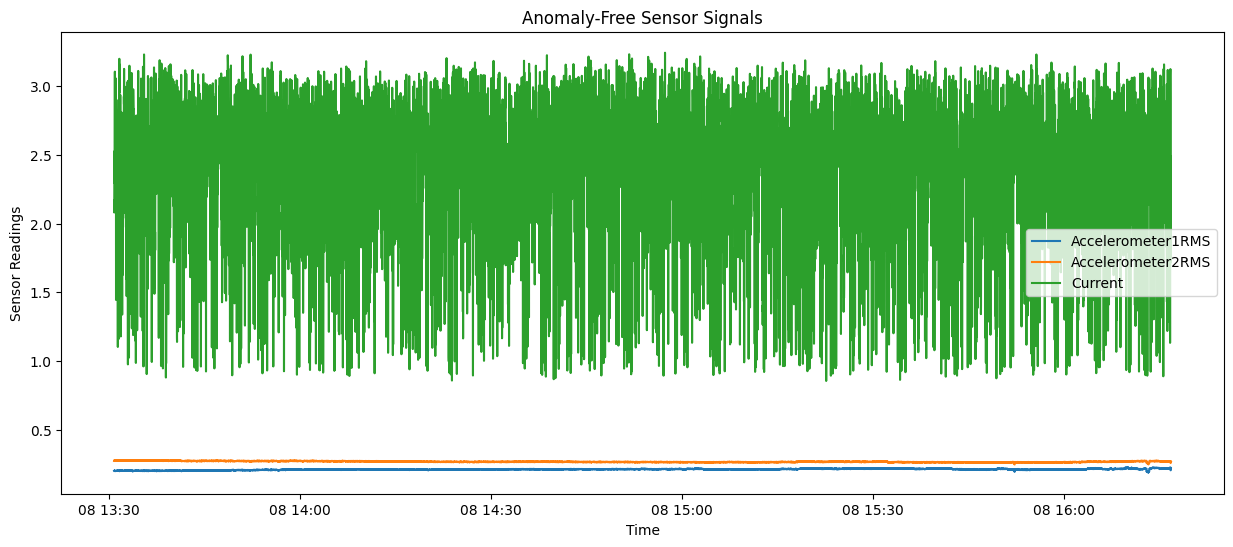

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df_normal['Accelerometer1RMS'], label='Accelerometer1RMS')
plt.plot(df_normal['Accelerometer2RMS'], label='Accelerometer2RMS')
plt.plot(df_normal['Current'], label='Current')
plt.title("Anomaly-Free Sensor Signals")
plt.xlabel("Time")
plt.ylabel("Sensor Readings")
plt.legend()
plt.show()


In [12]:
time_diff = df_normal.index.to_series().diff().dropna()
time_diff.min()
time_diff.max()

Timedelta('0 days 00:00:02')